In [5]:
import cv2

import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

In [6]:
#set the path to image
image_path = '../data_raw/HARV/NEON.D01.HARV.DP1.00042_2021_07_01.jpg'

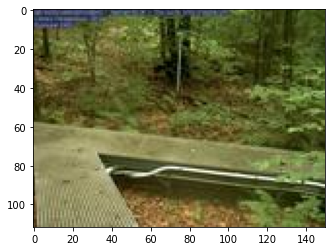

In [7]:
# Show the image from the path
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

##### This part will separate each pixel in the image, and plot the RGB value as a 3D plot

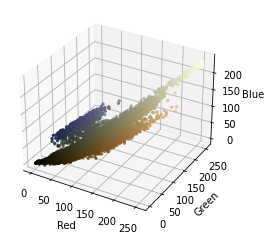

In [8]:
r, g, b = cv2.split(img)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")
pixel_colors = img.reshape((np.shape(img)[0]*np.shape(img)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()
axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()


##### This part is where we separate the pixel into different HSV value and display it as a 3D graph, this should serve as a guide on how to set the HSV value range for the image mask

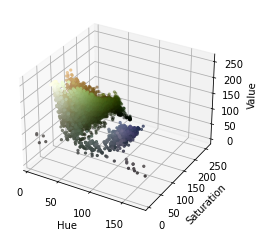

In [9]:
hsv_img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
h, s, v = cv2.split(hsv_img)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()


##### This part will let us test the effectiveness of the HSV mask by applying it on the image

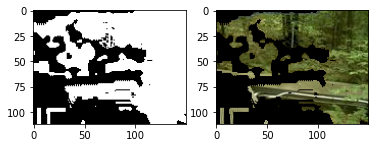

In [10]:
lower_hsv_val = (29, 20, 20)
upper_hsv_val = (80, 255,255)

mask = cv2.inRange(hsv_img, lower_hsv_val, upper_hsv_val)
result = cv2.bitwise_and(img, img, mask=mask)
#plot the mask
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
#plot image with mask applied
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()